<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/Pendulum2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# https://www.youtube.com/watch?v=ENNyltVTJaE

import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [21]:
t, m, g = smp.symbols('t m g')
the = smp.symbols(r'\theta', cls=smp.Function)
the = the(t)
the_d = smp.diff(the, t)
the_dd = smp.diff(the_d, t)

the_dd

Derivative(\theta(t), (t, 2))

In [22]:
x, y = smp.symbols('x y', cls=smp.Function)
x = x(the)
y = y(the)

In [23]:
path = 'parab'

if path == 'taut':
    x = smp.sin(2*the) + 2*the
    y = 1 - smp.cos(2*the)
    x_f = smp.lambdify(the, x)
    y_f = smp.lambdify(the, y)
elif path == 'parab':
    x = the
    y = the**2
    x_f = smp.lambdify(the, x)
    y_f = smp.lambdify(the, y)

In [24]:
T = 1/2 * m * (smp.diff(x, t)**2 + smp.diff(y, t)**2)
V = m * g * y
L = T - V

L

-g*m*\theta(t)**2 + 0.5*m*(4*\theta(t)**2*Derivative(\theta(t), t)**2 + Derivative(\theta(t), t)**2)

In [25]:
LE = smp.diff(L, the) - smp.diff(smp.diff(L, the_d), t)
LE = LE.simplify()

LE

m*(-2*g*\theta(t) - 4.0*\theta(t)**2*Derivative(\theta(t), (t, 2)) - 4.0*\theta(t)*Derivative(\theta(t), t)**2 - 1.0*Derivative(\theta(t), (t, 2)))

In [26]:
deriv_2 = smp.solve(LE, the_dd)[0]

deriv_2

2.0*(-g - 2.0*Derivative(\theta(t), t)**2)*\theta(t)/(4.0*\theta(t)**2 + 1.0)

In [27]:
deriv_2_s = deriv_2.subs([(g, 9.81)])

deriv_2_s

2.0*(-2.0*Derivative(\theta(t), t)**2 - 9.81)*\theta(t)/(4.0*\theta(t)**2 + 1.0)

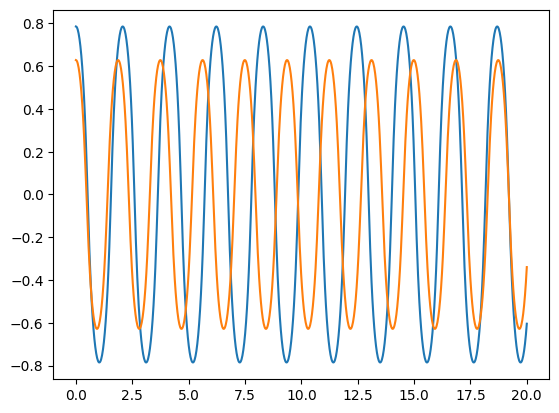

In [28]:
deriv1_f = smp.lambdify([the_d], the_d)
deriv2_f = smp.lambdify([the, the_d], deriv_2_s)

def func(s, t):
    return [deriv1_f(s[1]), deriv2_f(s[0], s[1])]

t = np.linspace(0, 20, 1000)

sol1 = odeint(func, y0=[np.pi/4, 0], t=t)
sol2 = odeint(func, y0=[np.pi/5, 0], t=t)

plt.plot(t, sol1.T[0])
plt.plot(t, sol2.T[0])

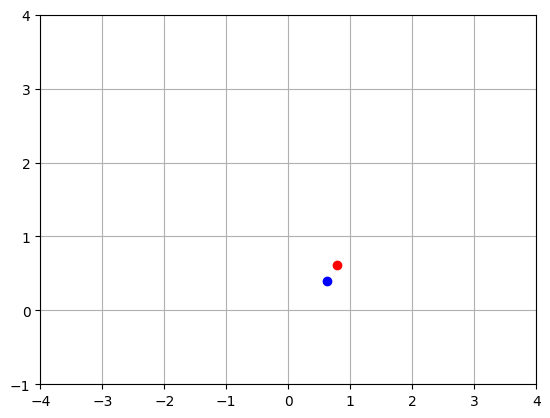

In [29]:
def get_xy(theta):
    return x_f(theta), y_f(theta)

x1, y1 = get_xy(sol1.T[0])
x2, y2 = get_xy(sol2.T[0])

def animate(i):
    ln1.set_data([x1[i]], [y1[i]])
    ln2.set_data([x2[i]], [y2[i]])

fig, ax = plt.subplots(1,1)
ax.grid()
ln1, = plt.plot([], [], 'ro')
ln2, = plt.plot([], [], 'bo')
ax.set_ylim(-1, 4)
ax.set_xlim(-4, 4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif', writer='pillow', fps=50)